In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.facecolor'] = '.0'
plt.rcParams['axes.facecolor'] = '.2'
plt.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams['text.color'] = 'grey'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
plt.rcParams['axes.edgecolor'] = 'purple'

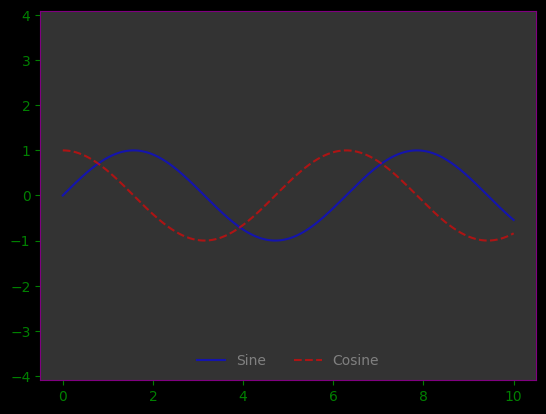

In [15]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine', alpha=.6)
ax.plot(x, np.cos(x), '--r', label='Cosine',alpha=.6)
ax.axis('equal')
ax.legend(loc='lower center', frameon=False, ncol=2);

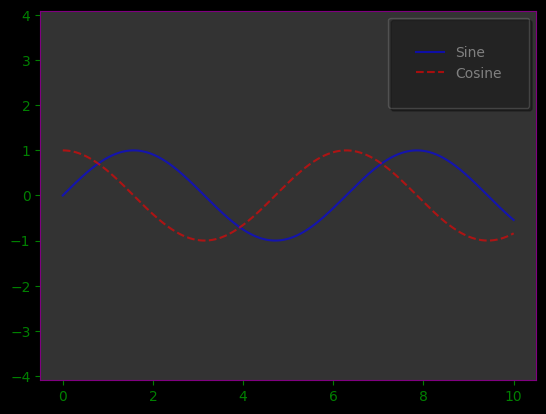

In [16]:
ax.legend(fancybox=True,framealpha=.2,shadow=True,borderpad=2)
fig

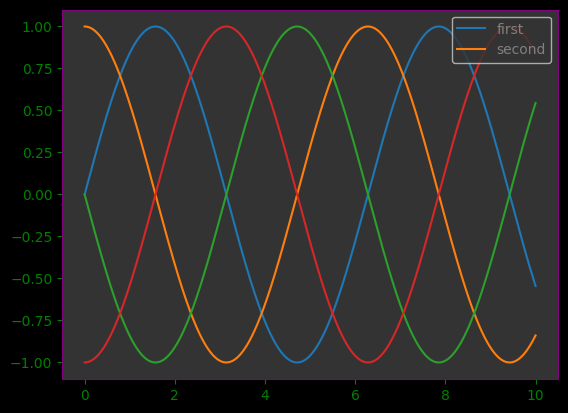

In [17]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

plt.legend(lines[:2], ['first', 'second'], loc='upper right');

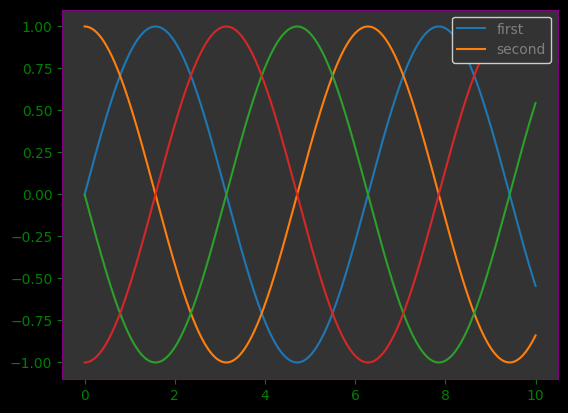

In [18]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True,loc='upper right');

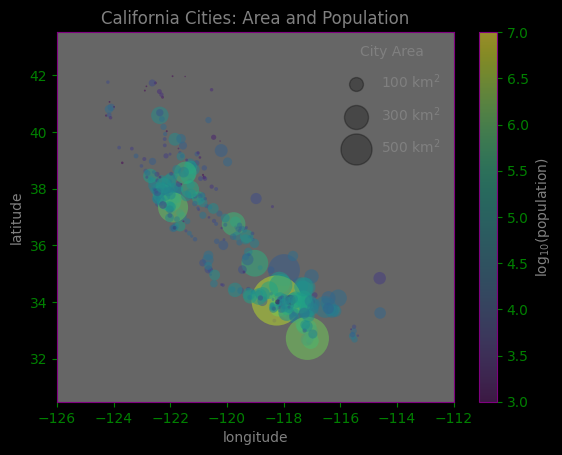

In [39]:
import pandas as pd


plt.axes().set_facecolor('.4')
cities = pd.read_csv('california_cities.csv')

lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
plt.axis([-126,-112,30,44])

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

In [32]:
np.log10(population).describe(), population.describe()

(count    482.000000
 mean       4.395021
 std        0.651117
 min        0.000000
 25%        4.037506
 50%        4.463257
 75%        4.822591
 max        6.589314
 Name: population_total, dtype: float64,
 count    4.820000e+02
 mean     6.489493e+04
 std      2.032041e+05
 min      1.000000e+00
 25%      1.090200e+04
 50%      2.905750e+04
 75%      6.646650e+04
 max      3.884307e+06
 Name: population_total, dtype: float64)

In [40]:
#seems legit
cities.iloc[np.argmax(population)]

Unnamed: 0                   239
city                  LosAngeles
latd                       34.05
longd                    -118.25
elevation_m                 71.0
elevation_ft                 2.0
population_total         3884307
area_total_sq_mi           503.0
area_land_sq_mi            469.0
area_water_sq_mi            34.0
area_total_km2            1302.0
area_land_km2             1214.0
area_water_km2              88.0
area_water_percent           6.7
Name: 239, dtype: object

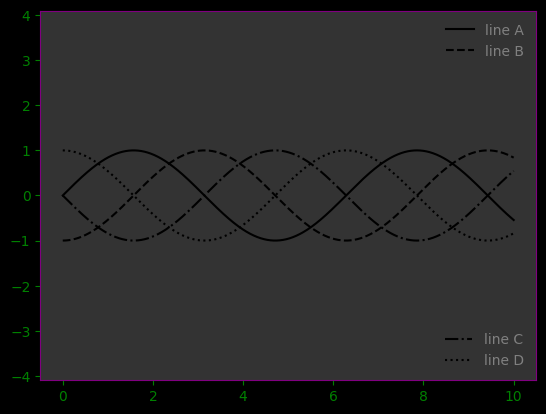

In [43]:
#creating multiple legends

fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);